 # Freemium A/B Testing - Project 

### Project overview
In this challenge, you'll help a B2B (business-to-business) SaaS (software-as-a-service) company analyze its recent A/B test for its explainer video.
The company uses these videos to convince free users to start a premium trial.
This is a very common task for data scientists in tech companies, and it's similar to the Pricing Test from Challenge #5.


### Background

Two versions of the single variable: Trail <br> To check the effect of variation on a user's behavior<br>


The term "freemium" refers to a service with two tiers:

. Free tier that has only basic capabilities.

. Premium tier(s) that has the full set of features.


You see this business model all the time: Trello (Gold), Amazon (Prime), and even Dropbox.

Freemium Business Model (source: Wikipedia)
The free tier is intended to lower the friction to signing up for a service and to provide a preview of what the premium tiers offer.
For many consumer-facing applications, the up-sell process is not very complicated.
However, for B2B software, it can be trickier to convince free users to upgrade to premium plans due to a variety of reasons.  Two of the most common are: <br>
&emsp;&emsp;1) Users may first need approval from a manager or budgeting department. <br>
&emsp;&emsp;2) Users might not understand what the premium plan offers, especially if it introduces new services and features.<br>
    
    
To address that second obstacle, some companies will produce explainer videos that educate the user on the additional benefits for the premium tier. ![Purchase-funnel.png](Purchase-funnel.png)

<img src= 'Purchase-funnel.png' width=200/>

# I- Executive Summary

Two versions of the single variable: Trail<br>
<br>
To check the effect of variation on a user's behavior<br>                          
<br>
Target variable = trial. Binary type. <br>
### CLASSIFICATION PROBLEM <br> 
    use Decision Tree, Random Forest, XGBoost and Neural Network Decision tree.

Perform these operations on data:<br>
select distiinct from device and change the device to mobile where browser = Android or iOS. <br>
change to desktop where browser = IE, safari, chrome - check with select distinct<br>

### Business Objectives   

For this challenge, a "conversion" is defined as a user who began a premium trial <br>
•	Determine which sources/devices/industries had the highest conversion rates.<br>
•	Build a model that can predict conversion rate based on user data.<br>
•	For high conversion rate users, what are the implications for the company's marketing team?<br>
•	For low conversion rate users, what are the implications for the company's customer success teams?<br>
•	Provide actionable insights to the business. What have we learned from this test?<br>


# II- Business Understanding

### Define Organization  

###  Organization  

###  Intended Stakeholders of Data  

###  Define Business Objectives   

###  Background   

### Business Success Criteria  

### Situation Assessment  

### Inventory of Resources Requirements  

### Assumptions, and Constraints   

### Risks and Contingencies   

### Terminology   

### Costs and Benefits  

### Produce Project Plan   

### Project Plan   

insert project plan here

### Define Business Analytics Goal 


* First, determine which sources/countries/devices had the highest conversion rates.  
* Next, build a model that can predict conversion rate based on visitor information.  
* What insights can you draw from your model? Which features were the most impactful?  
* Finally, provide actionable insights to the business. What have we learned from this campaign? 

### Business Analytics Goals 

### Business Analytics Success Criteria  

# III- Data Understanding

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Run multiple commands and get multiple outputs within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Collect Initial Data   

In [3]:
# Importing the dataset
df_ab  = pd.read_csv('ab_trial_results.csv')

In [5]:
# show top rows
df_ab.head(11)

,user_id,date,source,device,payee,browser,trial,group
0,7867258,2017-01-04,LinkedIn,desktop,Non-Primary,IE,0,Test
1,74864773,2017-01-05,Facebook,desktop,Non-Primary,Chrome,0,Test
2,56842734,2017-01-05,Facebook,desktop,Non-Primary,Safari,0,Control
3,73888172,2017-01-07,LinkedIn,desktop,Non-Primary,Chrome,0,Test
4,35589853,2017-01-06,Facebook,desktop,Non-Primary,Android (In-App),0,Test
5,83056259,2017-01-06,Facebook,desktop,Primary,iOS (In-App),0,Control
6,99220253,2017-01-04,LinkedIn,desktop,Primary,iOS (In-App),0,Test
7,38886933,2017-01-03,LinkedIn,desktop,Non-Primary,Android (In-App),0,Test
8,97726489,2017-01-08,LinkedIn,desktop,Non-Primary,Chrome,1,Test
9,74333646,2017-01-10,Facebook,desktop,Non-Primary,Android (In-App),0,Test


### Initial Data Collection Report   

user_id - Unique ID for user.

date - Date the user watched explainer video.

source - Marketing channel user came from.

Device - Was user on a mobile device or a Laptop?

payee - Whether the user is the primary decision-maker for budgeting.

browser - The user's browser.

trial - Did the user convert, i.e. start a premium trial?

group - Group (test / control).


###   Describe Data at High Level   

In [9]:
# Number of rows
len(df_ab)  

346929

In [6]:
df_ab.shape

(346929, 8)

In [6]:
# list of columns
df_ab.columns

Index(['user_id', 'date', 'source', 'device', 'payee', 'browser', 'trial',
       'group'],
      dtype='object')

In [8]:
df_ab.info()  # Information on the columns
                  # Similr to str() function in R
                  # look at summary of numerical fields by using describe() function
                  # It Printout summary statistics for numerical fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346929 entries, 0 to 346928
Data columns (total 8 columns):
user_id    346929 non-null int64
date       346929 non-null object
source     346929 non-null object
device     346929 non-null object
payee      346929 non-null object
browser    346929 non-null object
trial      346929 non-null int64
group      346929 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [4]:
# Importing the dataset user_industry.csv
df_ui  = pd.read_csv('user_industry.csv')

In [8]:
# View first 12 rows
df_ui.head(12)

,user_id,sex,age,industry_code
0,34621955,M,31,MFG
1,91757323,F,38,ICG
2,93294142,M,34,LPK
3,74191561,F,33,SPC
4,47442992,M,41,LPP
5,81071382,M,44,SPC
6,18375168,F,42,AOR
7,43526901,F,42,LPK
8,28813887,F,61,SPC
9,40388680,M,40,MFE


In [11]:
# Number of rows
len(df_ui)

346573

In [5]:
# Since we are using 2 datasets we are mergining the Data.

df_merge= pd.merge(df_ab, df_ui, on='user_id', how = 'inner', left_index = False, right_index = True) 


In [10]:
# view first 20 columns of merged dataset.
df_merge.head(20)

,user_id,date,source,device,payee,browser,trial,group,sex,age,industry_code
0,7867258,2017-01-04,LinkedIn,desktop,Non-Primary,IE,0,Test,M,37,ICG
1,74864773,2017-01-05,Facebook,desktop,Non-Primary,Chrome,0,Test,F,40,BOR
2,56842734,2017-01-05,Facebook,desktop,Non-Primary,Safari,0,Control,F,29,MFG
3,73888172,2017-01-07,LinkedIn,desktop,Non-Primary,Chrome,0,Test,F,29,MFE
4,35589853,2017-01-06,Facebook,desktop,Non-Primary,Android (In-App),0,Test,M,31,PWO
5,83056259,2017-01-06,Facebook,desktop,Primary,iOS (In-App),0,Control,F,33,LPK
6,99220253,2017-01-04,LinkedIn,desktop,Primary,iOS (In-App),0,Test,M,32,LPC
7,38886933,2017-01-03,LinkedIn,desktop,Non-Primary,Android (In-App),0,Test,M,42,GRT
8,97726489,2017-01-08,LinkedIn,desktop,Non-Primary,Chrome,1,Test,M,46,LPK
9,74333646,2017-01-10,Facebook,desktop,Non-Primary,Android (In-App),0,Test,M,29,LPP


In [16]:
# Number of rows
df_merge.shape

(346573, 11)

In [11]:
df_merge.columns

Index(['user_id', 'date', 'source', 'device', 'payee', 'browser', 'trial',
       'group', 'sex', 'age', 'industry_code'],
      dtype='object')

In [6]:
#rearrange cloumn order in new dataframe
df_merge = df_merge[['user_id','sex','age','date', 'source', 'device', 'browser', 'payee','industry_code','group','trial']]

df_merge.head(10)

,user_id,sex,age,date,source,device,browser,payee,industry_code,group,trial
0,7867258,M,37,2017-01-04,LinkedIn,desktop,IE,Non-Primary,ICG,Test,0
1,74864773,F,40,2017-01-05,Facebook,desktop,Chrome,Non-Primary,BOR,Test,0
2,56842734,F,29,2017-01-05,Facebook,desktop,Safari,Non-Primary,MFG,Control,0
3,73888172,F,29,2017-01-07,LinkedIn,desktop,Chrome,Non-Primary,MFE,Test,0
4,35589853,M,31,2017-01-06,Facebook,desktop,Android (In-App),Non-Primary,PWO,Test,0
5,83056259,F,33,2017-01-06,Facebook,desktop,iOS (In-App),Primary,LPK,Control,0
6,99220253,M,32,2017-01-04,LinkedIn,desktop,iOS (In-App),Primary,LPC,Test,0
7,38886933,M,42,2017-01-03,LinkedIn,desktop,Android (In-App),Non-Primary,GRT,Test,0
8,97726489,M,46,2017-01-08,LinkedIn,desktop,Chrome,Non-Primary,LPK,Test,1
9,74333646,M,29,2017-01-10,Facebook,desktop,Android (In-App),Non-Primary,LPP,Test,0


In [23]:
df_merge.describe()

,user_id,age,trial
count,3.465730e+05,346573.000000,346573.000000
mean,5.005189e+07,39.056695,0.049603
std,2.891402e+07,6.768201,0.217123
min,1.760000e+02,21.000000,0.000000
25%,2.500549e+07,34.000000,0.000000
50%,5.005859e+07,38.000000,0.000000
75%,7.504929e+07,43.000000,0.000000
max,9.999994e+07,64.000000,1.000000


###  Data Description Report  

##### Examine, Enumerate (count) issues and Visualize
prepare meta-data report. Examine data characteristics, count data issues, Visualize.
-	Describe the acquired data, format of data, quantity of data GBs, no. of rows, tables, fields in each table etc. 
o	Count(rows)
-	Describe the fields/ columns/ dimensions of the data objects. 
o	count(columns/dimensions/ input variables),
-	Check if these dimensions/ inputs are useful in predicting the Target Variable?
o	count(target Variables in data if any)
-	Enumerate/ count problems with the data, including inaccurate or invalid values, missing values, unexpected distributions, and incorrect data-types ex.: date format as character.
-	Visualize data to gain further insights into the characteristics of the data, especially those masked by summary statistics.
o	graphs & plots, mean median mode

In [25]:
df_merge.info

<bound method DataFrame.info of          user_id sex  age        date    source   device           browser  \
0        7867258   M   37  2017-01-04  LinkedIn  desktop                IE   
1       74864773   F   40  2017-01-05  Facebook  desktop            Chrome   
2       56842734   F   29  2017-01-05  Facebook  desktop            Safari   
3       73888172   F   29  2017-01-07  LinkedIn  desktop            Chrome   
4       35589853   M   31  2017-01-06  Facebook  desktop  Android (In-App)   
...          ...  ..  ...         ...       ...      ...               ...   
346924  89143122   F   42  2017-01-06  LinkedIn  desktop  Android (In-App)   
346925  27516790   F   34  2017-01-10  Facebook  desktop                IE   
346926  52121252   M   45  2017-01-08     Email  desktop                IE   
346927  64140107   M   33  2017-01-09  LinkedIn  desktop           FireFox   
346928  99323906   F   50  2017-01-07  Facebook  desktop            Safari   

              payee industry_co

In [27]:
# describe datatypes of all columns
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346573 entries, 0 to 346928
Data columns (total 11 columns):
user_id          346573 non-null int64
sex              346573 non-null object
age              346573 non-null int64
date             346573 non-null object
source           346573 non-null object
device           346573 non-null object
browser          346573 non-null object
payee            346573 non-null object
industry_code    346573 non-null object
group            346573 non-null object
trial            346573 non-null int64
dtypes: int64(3), object(8)
memory usage: 31.7+ MB


In [39]:
df_merge.head()

,user_id,sex,age,date,source,device,browser,payee,industry_code,group,trial
0,7867258,M,37,2017-01-04,LinkedIn,desktop,IE,Non-Primary,ICG,Test,0
1,74864773,F,40,2017-01-05,Facebook,desktop,Chrome,Non-Primary,BOR,Test,0
2,56842734,F,29,2017-01-05,Facebook,desktop,Safari,Non-Primary,MFG,Control,0
3,73888172,F,29,2017-01-07,LinkedIn,desktop,Chrome,Non-Primary,MFE,Test,0
4,35589853,M,31,2017-01-06,Facebook,desktop,Android (In-App),Non-Primary,PWO,Test,0


In [12]:
# find duplicates in df1
df_merge[df_merge.duplicated(['user_id'], keep=False)]

,user_id,sex,age,date,source,device,browser,payee,industry_code,group,trial


###  Explore Data  

In [7]:
# familiar with basic data characteristics 
# distribution of various variables

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# assign merged dataframe to a new frame for modification
df1 = df_merge.copy()
df1.drop(['user_id'], axis=1, inplace=True)
df1.drop(['date'], axis=1, inplace=True)

In [29]:
df1.shape
df1.head(10)

(346573, 9)

,sex,age,source,device,browser,payee,industry_code,group,trial
0,M,37,LinkedIn,desktop,IE,Non-Primary,ICG,Test,0
1,F,40,Facebook,desktop,Chrome,Non-Primary,BOR,Test,0
2,F,29,Facebook,desktop,Safari,Non-Primary,MFG,Control,0
3,F,29,LinkedIn,desktop,Chrome,Non-Primary,MFE,Test,0
4,M,31,Facebook,desktop,Android (In-App),Non-Primary,PWO,Test,0
5,F,33,Facebook,desktop,iOS (In-App),Primary,LPK,Control,0
6,M,32,LinkedIn,desktop,iOS (In-App),Primary,LPC,Test,0
7,M,42,LinkedIn,desktop,Android (In-App),Non-Primary,GRT,Test,0
8,M,46,LinkedIn,desktop,Chrome,Non-Primary,LPK,Test,1
9,M,29,Facebook,desktop,Android (In-App),Non-Primary,LPP,Test,0


## Data cleansing
there is a serious discrepency in data collection. As it shows ANdroid OS and iOS as desktop, whereas these are mobile devices. <br>

- check for distinct values in browser and device columns then update appropriately.

In [17]:
# getting all unique values from categorical columns: Device and browser

df1.device.unique()
df1.browser.unique()

array(['desktop'], dtype=object)

array(['IE', 'Chrome', 'Safari', 'Android (In-App)', 'iOS (In-App)',
       'FireFox', 'Opera'], dtype=object)

#### update the device column
updating the device column to "mobile" where browser = 'Android (In-App)', 'iOS (In-App)' <br>
updating the device column to "laptop" where browser = 'IE', 'Chrome', 'Safari','FireFox', 'Opera'

In [9]:
# copy df_merge to a new df for conversion
# new = old[['A', 'C', 'D'...,'n']].copy()

df_conv = df1.copy()

In [31]:
df_conv.shape
df_conv.head(10)

(346573, 9)

,sex,age,source,device,browser,payee,industry_code,group,trial
0,M,37,LinkedIn,desktop,IE,Non-Primary,ICG,Test,0
1,F,40,Facebook,desktop,Chrome,Non-Primary,BOR,Test,0
2,F,29,Facebook,desktop,Safari,Non-Primary,MFG,Control,0
3,F,29,LinkedIn,desktop,Chrome,Non-Primary,MFE,Test,0
4,M,31,Facebook,desktop,Android (In-App),Non-Primary,PWO,Test,0
5,F,33,Facebook,desktop,iOS (In-App),Primary,LPK,Control,0
6,M,32,LinkedIn,desktop,iOS (In-App),Primary,LPC,Test,0
7,M,42,LinkedIn,desktop,Android (In-App),Non-Primary,GRT,Test,0
8,M,46,LinkedIn,desktop,Chrome,Non-Primary,LPK,Test,1
9,M,29,Facebook,desktop,Android (In-App),Non-Primary,LPP,Test,0


In [10]:
df_conv.loc[df_conv.browser == 'Android (In-App)', 'device'] = 'mobile'
df_conv.loc[df_conv.browser == 'iOS (In-App)', 'device'] = 'mobile'

In [34]:
df_conv.head(20)

,sex,age,source,device,browser,payee,industry_code,group,trial
0,M,37,LinkedIn,desktop,IE,Non-Primary,ICG,Test,0
1,F,40,Facebook,desktop,Chrome,Non-Primary,BOR,Test,0
2,F,29,Facebook,desktop,Safari,Non-Primary,MFG,Control,0
3,F,29,LinkedIn,desktop,Chrome,Non-Primary,MFE,Test,0
4,M,31,Facebook,mobile,Android (In-App),Non-Primary,PWO,Test,0
5,F,33,Facebook,mobile,iOS (In-App),Primary,LPK,Control,0
6,M,32,LinkedIn,mobile,iOS (In-App),Primary,LPC,Test,0
7,M,42,LinkedIn,mobile,Android (In-App),Non-Primary,GRT,Test,0
8,M,46,LinkedIn,desktop,Chrome,Non-Primary,LPK,Test,1
9,M,29,Facebook,mobile,Android (In-App),Non-Primary,LPP,Test,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE1CB652B0>]],
      dtype=object)

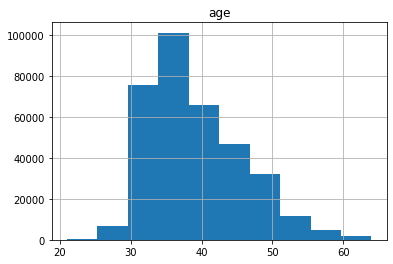

In [18]:
df_conv.hist(column='age')
plt.show()

age         AxesSubplot(0.125,0.657941;0.227941x0.222059)
trial    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
dtype: object

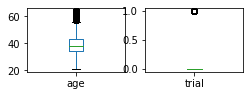

In [95]:
df_conv.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

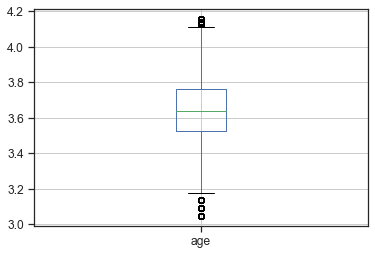

In [158]:
df_conv.boxplot('age')

Boxplot shows some age observations as outliers, to get a better understanding a count plot and density plot are used

In [35]:
import seaborn as sns

<Figure size 792x504 with 0 Axes>

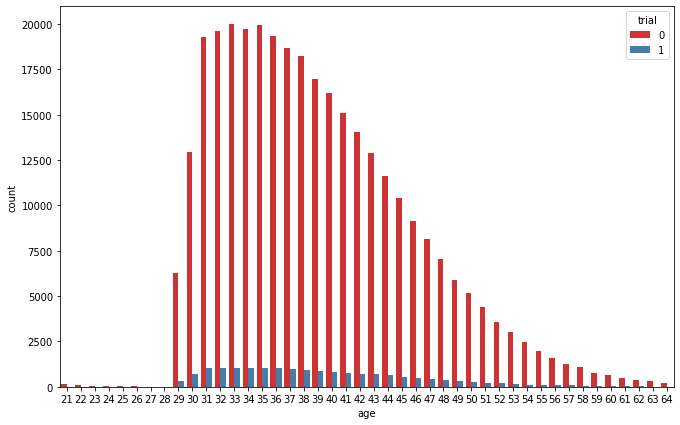

In [36]:
plt.figure(figsize=(11,7))
sns.countplot(x='age',hue='trial',data=df_conv,palette='Set1')

In [19]:
from scipy.stats import skew
skness = skew(df_conv['age'])
print(skness)

0.7431957394924333


In [57]:
from sklearn import preprocessing
df_conv['age_prep'] = preprocessing.scale(df_conv['age'])

<Figure size 792x504 with 0 Axes>

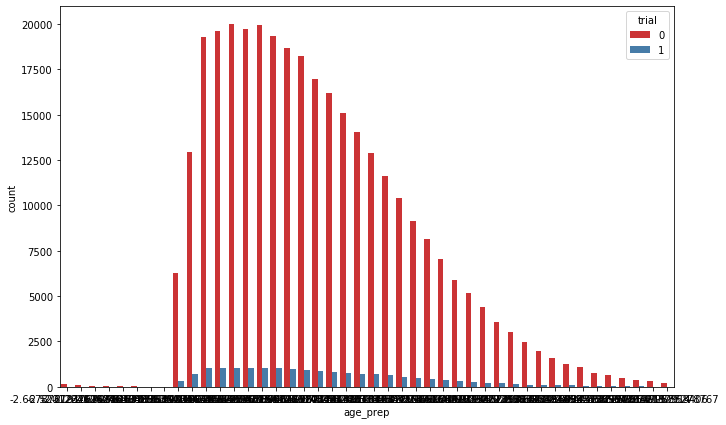

In [58]:
plt.figure(figsize=(11,7))
sns.countplot(x='age_prep',hue='trial',data=df_conv,palette='Set1')

In [60]:
from scipy.stats import boxcox
boxcox = boxcox(df_conv['age'])

In [62]:
print(boxcox)

(array([1.06351034, 1.06638371, 1.05310703, ..., 1.07035808, 1.05890925,
       1.07357175]), -0.9043909113004985)


As the age distribution is positive skewed, this can be normalized by Power transformation, Logarithmic transformation etc.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002034738C978>,
      dtype=object)

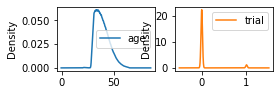

In [98]:
df_conv.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x066E5310>,
      dtype=object)

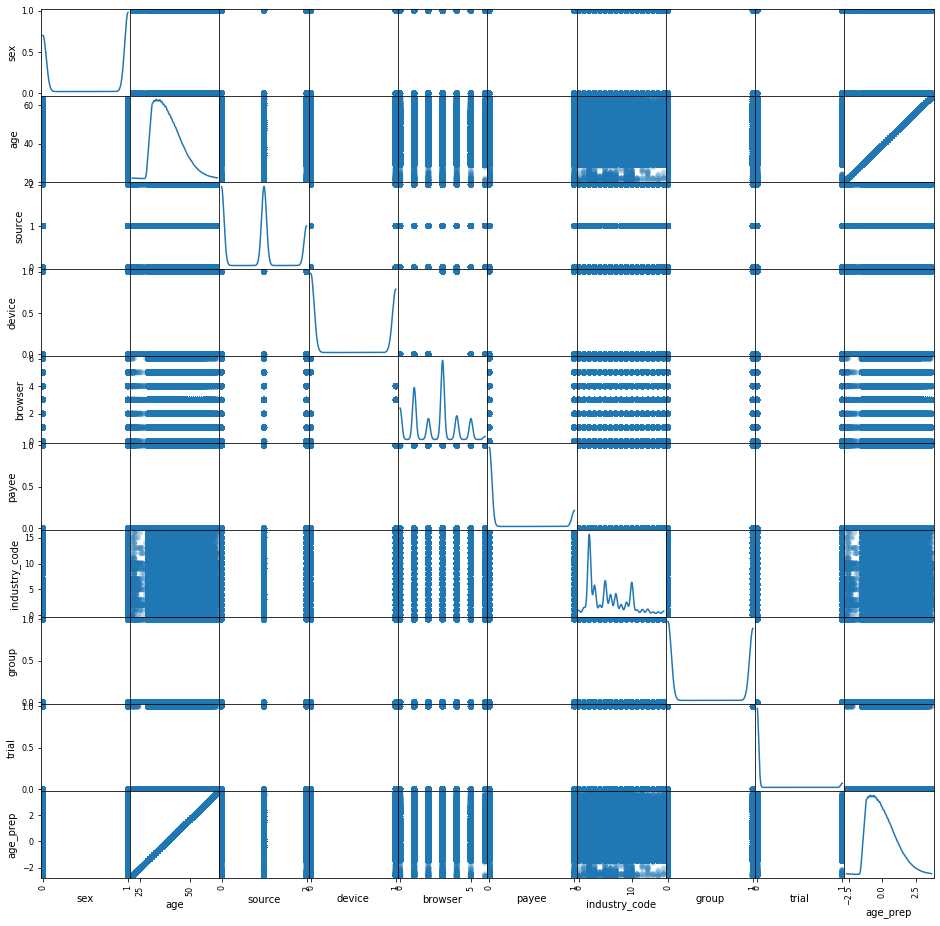

In [88]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_conv, alpha=0.3, figsize=(16,16), diagonal='kde', marker='o')
plt.show()

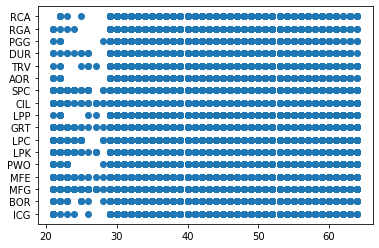

In [16]:
# Scatter Plot of Two Variables
plt.scatter(df_conv['age'], df_conv['industry_code']);

<Figure size 792x504 with 0 Axes>

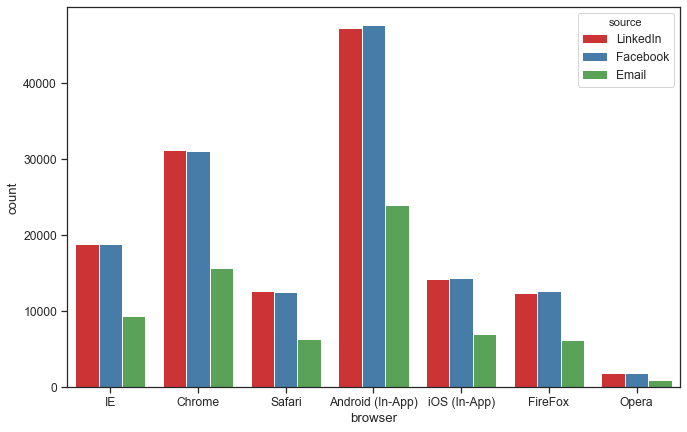

In [121]:
plt.figure(figsize=(11,7))
sns.countplot(x='browser',hue='source',data=df_conv,palette='Set1')

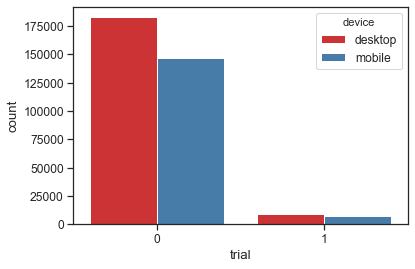

In [130]:
sns.countplot(x='trial',hue='device',data=df_conv,palette='Set1')

In [37]:
###  Data Visualization with Seaborn
import matplotlib.pyplot as plt
import seaborn as sns  # Uses matplot lib - advanced functionalities ... it builds on the top of Matplotlib
%matplotlib inline


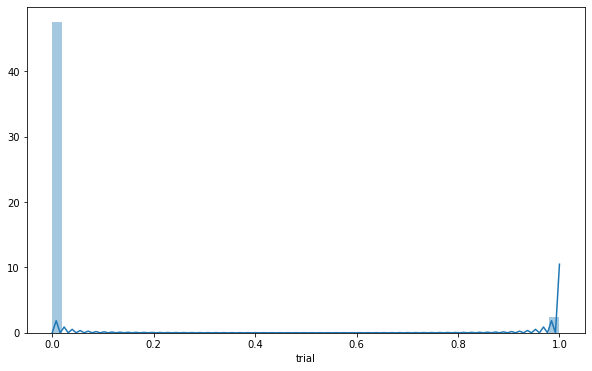

In [78]:
# increasing the width of the Chart
plt.rcParams['figure.figsize'] = 10,6 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
vis1 = sns.distplot(df_conv["trial"]) # pass it one variable


In [38]:
# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

### Data Exploration Report (Descriptive Statistics/Data Profile)   

insert data report if any.

### Data Correlation

In [81]:
# Using the pandas  options, I set the fload format to decimal to 3. 
pd.options.display.float_format = '{:,.3f}'.format

In [82]:
df_conv.corr()

,age,trial
age,1.000,-0.001
trial,-0.001,1.000


<Figure size 1152x720 with 0 Axes>

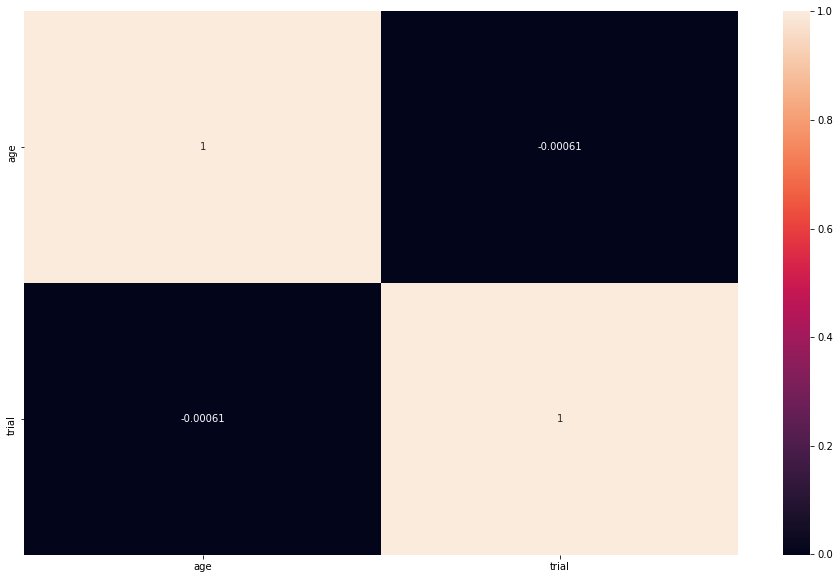

In [83]:
#Visualize the Correlation using the Seaborn Heatmap function
plt.figure(figsize =(16,10))
sns.heatmap(df_conv.corr(), annot=True)
plt.show()

Converting all the categorical values to numerical values for correlation

In [104]:
df_conv.head()
df_conv.info()

,sex,age,date,source,device,browser,payee,industry_code,group,trial
0,M,37,2017-01-04,LinkedIn,desktop,IE,Non-Primary,ICG,Test,0
1,F,40,2017-01-05,Facebook,desktop,Chrome,Non-Primary,BOR,Test,0
2,F,29,2017-01-05,Facebook,desktop,Safari,Non-Primary,MFG,Control,0
3,F,29,2017-01-07,LinkedIn,desktop,Chrome,Non-Primary,MFE,Test,0
4,M,31,2017-01-06,Facebook,mobile,Android (In-App),Non-Primary,PWO,Test,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 346573 entries, 0 to 346928
Data columns (total 10 columns):
sex              346573 non-null object
age              346573 non-null int64
date             346573 non-null object
source           346573 non-null object
device           346573 non-null object
browser          346573 non-null object
payee            346573 non-null object
industry_code    346573 non-null object
group            346573 non-null object
trial            346573 non-null int64
dtypes: int64(2), object(8)
memory usage: 39.1+ MB


Finding all unique values in the columns:

In [105]:
df_conv.sex.unique()
df_conv.source.unique()
df_conv.device.unique()
df_conv.browser.unique()
df_conv.payee.unique()
df_conv.industry_code.unique()
df_conv.group.unique()

array(['M', 'F'], dtype=object)

array(['LinkedIn', 'Facebook', 'Email'], dtype=object)

array(['desktop', 'mobile'], dtype=object)

array(['IE', 'Chrome', 'Safari', 'Android (In-App)', 'iOS (In-App)',
       'FireFox', 'Opera'], dtype=object)

array(['Non-Primary', 'Primary', 'Unknown'], dtype=object)

array(['ICG', 'BOR', 'MFG', 'MFE', 'PWO', 'LPK', 'LPC', 'GRT', 'LPP',
       'CIL', 'SPC', 'AOR', 'TRV', 'DUR', 'PGG', 'RGA', 'RCA'],
      dtype=object)

array(['Test', 'Control'], dtype=object)

Converting and Factorizing all the values

In [107]:
# Converting industry_code into Label Encoding
df_conv.columns

Index(['sex', 'age', 'date', 'source', 'device', 'browser', 'payee',
       'industry_code', 'group', 'trial'],
      dtype='object')

In [40]:
df_conv.sex.replace('F', 0,inplace=True)
df_conv.sex.replace('M', 1,inplace=True)

In [41]:
df_conv.source.replace('LinkedIn', 0,inplace=True)
df_conv.source.replace('Facebook', 1,inplace=True)
df_conv.source.replace('Email', 2,inplace=True)

In [42]:
df_conv.device.replace('desktop', 0,inplace=True)
df_conv.device.replace('mobile', 1,inplace=True)

In [43]:
df_conv.browser.replace('IE', 0,inplace=True)
df_conv.browser.replace('Chrome', 1,inplace=True)
df_conv.browser.replace('Safari', 2,inplace=True)
df_conv.browser.replace('Android (In-App)', 3,inplace=True)
df_conv.browser.replace('iOS (In-App)', 4,inplace=True)
df_conv.browser.replace('FireFox', 5,inplace=True)
df_conv.browser.replace('Opera', 6,inplace=True)

In [44]:
df_conv.payee.replace('Non-Primary', 0,inplace=True)
df_conv.payee.replace('Primary', 1,inplace=True)
df_conv.payee.replace('Unknown', 1,inplace=True)

In [45]:
df_conv.industry_code.replace('ICG', 0,inplace=True)
df_conv.industry_code.replace('BOR', 1,inplace=True)
df_conv.industry_code.replace('MFG', 2,inplace=True)
df_conv.industry_code.replace('MFE', 3,inplace=True)
df_conv.industry_code.replace('PWO', 4,inplace=True)
df_conv.industry_code.replace('LPK', 5,inplace=True)
df_conv.industry_code.replace('LPC', 6,inplace=True)
df_conv.industry_code.replace('GRT', 7,inplace=True)
df_conv.industry_code.replace('LPP', 8,inplace=True)
df_conv.industry_code.replace('CIL', 9,inplace=True)
df_conv.industry_code.replace('SPC', 10,inplace=True)
df_conv.industry_code.replace('AOR', 11,inplace=True)
df_conv.industry_code.replace('TRV', 12,inplace=True)
df_conv.industry_code.replace('DUR', 13,inplace=True)
df_conv.industry_code.replace('PGG', 14,inplace=True)
df_conv.industry_code.replace('RGA', 15,inplace=True)
df_conv.industry_code.replace('RCA', 16,inplace=True)

In [46]:
df_conv.group.replace('Control', 0,inplace=True)
df_conv.group.replace('Test', 1,inplace=True)

In [47]:
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346573 entries, 0 to 346928
Data columns (total 9 columns):
sex              346573 non-null int64
age              346573 non-null int64
source           346573 non-null int64
device           346573 non-null int64
browser          346573 non-null int64
payee            346573 non-null int64
industry_code    346573 non-null int64
group            346573 non-null int64
trial            346573 non-null int64
dtypes: int64(9)
memory usage: 34.4 MB


In [48]:
df_conv.dtypes

sex              int64
age              int64
source           int64
device           int64
browser          int64
payee            int64
industry_code    int64
group            int64
trial            int64
dtype: object

<b> Convert DATA-TYPES in a data-frame  </b>
<t> When finding CORRELATION, all the columns must be numeric INT64. Convert all columns to Numeric INT64  </t>

In [49]:
# DataFrame.astype()
df_conv['device'].astype('int64')
df_conv['payee'].astype('int64')
df_conv.dtypes

0         0
1         0
2         0
3         0
4         1
         ..
346924    1
346925    0
346926    0
346927    0
346928    0
Name: device, Length: 346573, dtype: int64

0         0
1         0
2         0
3         0
4         0
         ..
346924    0
346925    0
346926    0
346927    0
346928    0
Name: payee, Length: 346573, dtype: int64

sex              int64
age              int64
source           int64
device           int64
browser          int64
payee            int64
industry_code    int64
group            int64
trial            int64
dtype: object

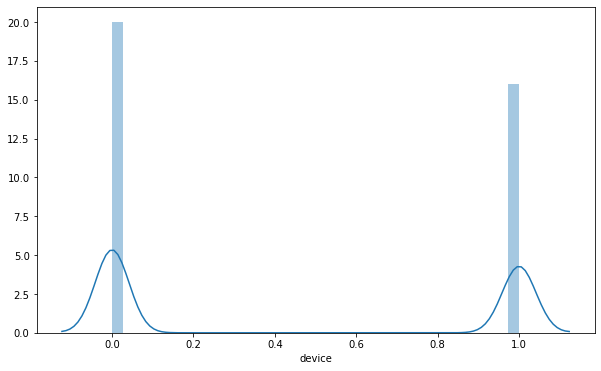

In [50]:
plt.rcParams['figure.figsize'] = 10,6 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
vis2 = sns.distplot(df_conv["device"]) # pass it one variable

<Figure size 1152x720 with 0 Axes>

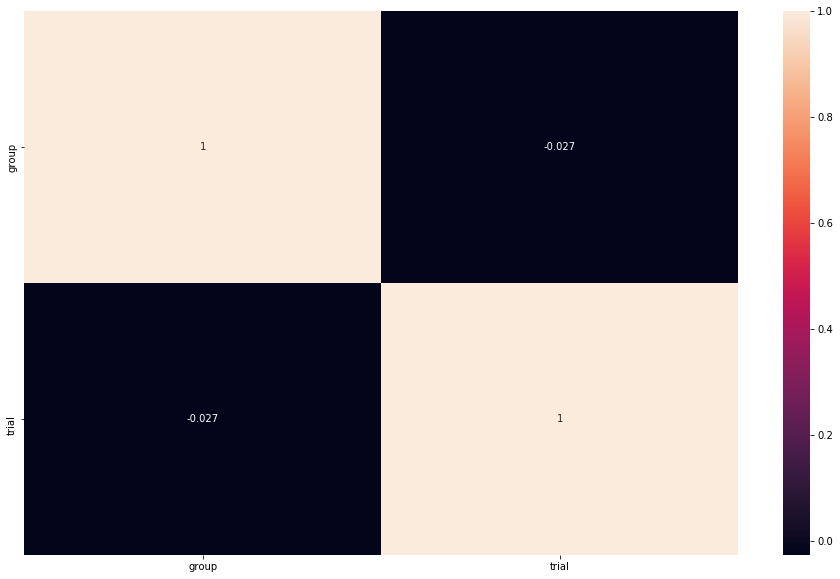

In [51]:
# Visualize the Correlation using the Seaborn Heatmap function (Two Variable only)
plt.figure(figsize =(16,10))
sns.heatmap(df_conv[['group', 'trial']].corr(), annot=True)
plt.show()

In [52]:
# Copied data frame for reference
dfcorr = df_conv.copy()

In [127]:
dfcorr.corr()

,sex,age,source,device,browser,payee,industry_code,group,trial
sex,1.000,0.002,-0.000,-0.002,-0.003,0.004,0.003,-0.001,-0.000
age,0.002,1.000,-0.002,-0.000,-0.003,0.001,-0.001,-0.001,-0.001
source,-0.000,-0.002,1.000,0.002,0.002,0.002,-0.001,-0.003,0.001
device,-0.002,-0.000,0.002,1.000,0.493,0.002,-0.004,0.002,0.001
browser,-0.003,-0.003,0.002,0.493,1.000,0.001,-0.001,-0.000,0.001
payee,0.004,0.001,0.002,0.002,0.001,1.000,0.001,0.001,-0.001
industry_code,0.003,-0.001,-0.001,-0.004,-0.001,0.001,1.000,-0.165,0.026
group,-0.001,-0.001,-0.003,0.002,-0.000,0.001,-0.165,1.000,-0.027
trial,-0.000,-0.001,0.001,0.001,0.001,-0.001,0.026,-0.027,1.000


Finding all types of Correlation  

In [128]:
dfcorr.corr(method='pearson')
dfcorr.corr(method='spearman')
dfcorr.corr(method='kendall')

,sex,age,source,device,browser,payee,industry_code,group,trial
sex,1.000,0.002,-0.000,-0.002,-0.003,0.004,0.003,-0.001,-0.000
age,0.002,1.000,-0.002,-0.000,-0.003,0.001,-0.001,-0.001,-0.001
source,-0.000,-0.002,1.000,0.002,0.002,0.002,-0.001,-0.003,0.001
device,-0.002,-0.000,0.002,1.000,0.493,0.002,-0.004,0.002,0.001
browser,-0.003,-0.003,0.002,0.493,1.000,0.001,-0.001,-0.000,0.001
payee,0.004,0.001,0.002,0.002,0.001,1.000,0.001,0.001,-0.001
industry_code,0.003,-0.001,-0.001,-0.004,-0.001,0.001,1.000,-0.165,0.026
group,-0.001,-0.001,-0.003,0.002,-0.000,0.001,-0.165,1.000,-0.027
trial,-0.000,-0.001,0.001,0.001,0.001,-0.001,0.026,-0.027,1.000


,sex,age,source,device,browser,payee,industry_code,group,trial
sex,1.000,0.002,-0.000,-0.002,-0.003,0.004,0.004,-0.001,-0.000
age,0.002,1.000,-0.002,0.000,-0.003,0.001,-0.000,-0.001,-0.000
source,-0.000,-0.002,1.000,0.002,0.002,0.002,0.001,-0.003,0.001
device,-0.002,0.000,0.002,1.000,0.555,0.002,-0.004,0.002,0.001
browser,-0.003,-0.003,0.002,0.555,1.000,0.001,-0.000,-0.000,0.001
payee,0.004,0.001,0.002,0.002,0.001,1.000,0.001,0.001,-0.001
industry_code,0.004,-0.000,0.001,-0.004,-0.000,0.001,1.000,-0.161,0.023
group,-0.001,-0.001,-0.003,0.002,-0.000,0.001,-0.161,1.000,-0.027
trial,-0.000,-0.000,0.001,0.001,0.001,-0.001,0.023,-0.027,1.000


,sex,age,source,device,browser,payee,industry_code,group,trial
sex,1.000,0.002,-0.000,-0.002,-0.002,0.004,0.003,-0.001,-0.000
age,0.002,1.000,-0.002,0.000,-0.002,0.001,-0.000,-0.001,-0.000
source,-0.000,-0.002,1.000,0.002,0.002,0.002,0.000,-0.003,0.001
device,-0.002,0.000,0.002,1.000,0.496,0.002,-0.003,0.002,0.001
browser,-0.002,-0.002,0.002,0.496,1.000,0.001,-0.000,-0.000,0.001
payee,0.004,0.001,0.002,0.002,0.001,1.000,0.001,0.001,-0.001
industry_code,0.003,-0.000,0.000,-0.003,-0.000,0.001,1.000,-0.139,0.020
group,-0.001,-0.001,-0.003,0.002,-0.000,0.001,-0.139,1.000,-0.027
trial,-0.000,-0.000,0.001,0.001,0.001,-0.001,0.020,-0.027,1.000


<Figure size 1152x720 with 0 Axes>

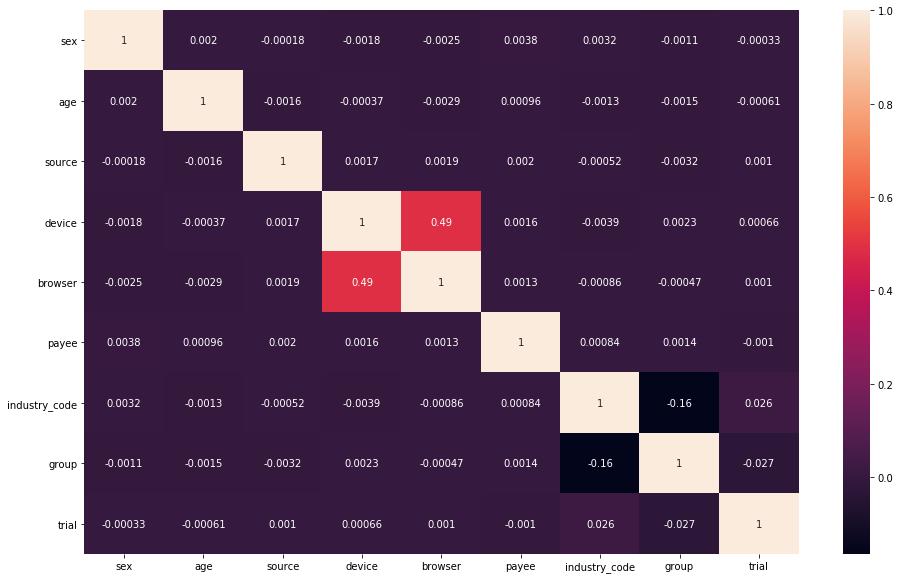

In [26]:
plt.figure(figsize =(16,10))
sns.heatmap(dfcorr.corr(), annot=True)
plt.show()

#### Using SelectKbest for scoring the input variables

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = dfcorr.iloc [:, 1:7]
y = dfcorr.iloc [:, -1]
# apply SelectKBest to all features except DATE column.
topFeats = SelectKBest(score_func=chi2, k='all')
fit = topFeats.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

print(featureScores.nlargest(6,'Score'))

           Specs       Score
5  industry_code  569.764723
3        browser    0.383054
4          payee    0.296445
1         source    0.266822
0            age    0.151227
2         device    0.084415


## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.78199773 0.11008659 0.0081071  0.09980858]


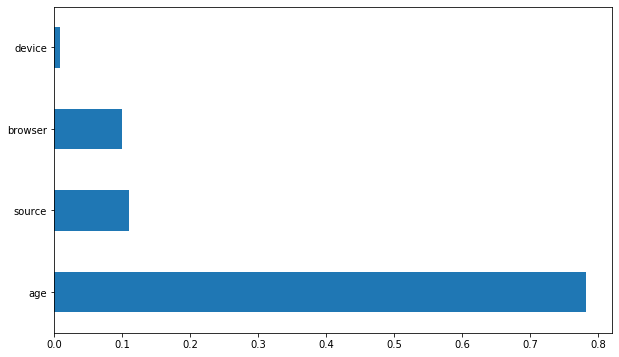

In [63]:
X = dfcorr.iloc [:, 1:5]
y = dfcorr.iloc [:, -1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Data Quality Report  

In [132]:
dfcorr.describe()  # Similar to summary() in R

,sex,age,source,device,browser,payee,industry_code,group,trial
count,"346,573.000","346,573.000","346,573.000","346,573.000","346,573.000","346,573.000","346,573.000","346,573.000","346,573.000"
mean,0.584,39.057,0.801,0.445,2.375,0.167,5.482,0.477,0.050
std,0.493,6.768,0.748,0.497,1.552,0.373,3.675,0.499,0.217
min,0.000,21.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,34.000,0.000,0.000,1.000,0.000,2.000,0.000,0.000
50%,1.000,38.000,1.000,0.000,3.000,0.000,5.000,0.000,0.000
75%,1.000,43.000,1.000,1.000,3.000,0.000,8.000,1.000,0.000
max,1.000,64.000,2.000,1.000,6.000,1.000,16.000,1.000,1.000


In [133]:
dfcorr.describe().transpose()  # change the rows and columns

,count,mean,std,min,25%,50%,75%,max
sex,"346,573.000",0.584,0.493,0.000,0.000,1.000,1.000,1.000
age,"346,573.000",39.057,6.768,21.000,34.000,38.000,43.000,64.000
source,"346,573.000",0.801,0.748,0.000,0.000,1.000,1.000,2.000
device,"346,573.000",0.445,0.497,0.000,0.000,0.000,1.000,1.000
browser,"346,573.000",2.375,1.552,0.000,1.000,3.000,3.000,6.000
payee,"346,573.000",0.167,0.373,0.000,0.000,0.000,0.000,1.000
industry_code,"346,573.000",5.482,3.675,0.000,2.000,5.000,8.000,16.000
group,"346,573.000",0.477,0.499,0.000,0.000,0.000,1.000,1.000
trial,"346,573.000",0.050,0.217,0.000,0.000,0.000,0.000,1.000


# VI- Data Preparation

### Data Set   

### Data Set Description  

### Select Data   

In [140]:
# Independent Variables
X = dfcorr.iloc[:, [1, 9]].values
# Target Variables
y = dfcorr.iloc[:, 9].values


### Rationale for Inclusion/Exclusion  

In [139]:
dfcorr.shape
dfcorr.head()

(346573, 10)

,sex,age,date,source,device,browser,payee,industry_code,group,trial
0,1,37,2017-01-04,0,0,0,0,0,1,0
1,0,40,2017-01-05,1,0,1,0,1,1,0
2,0,29,2017-01-05,1,0,2,0,2,0,0
3,0,29,2017-01-07,0,0,1,0,3,1,0
4,1,31,2017-01-06,1,1,3,0,4,1,0


### Clean Data  

In [141]:
#  Outlier Detection

from __future__ import division
import numpy

# Median absolute deviation
def mad(data, axis=None):
    return numpy.mean(numpy.abs(data - numpy.mean(data, axis)), axis)
mad = numpy.abs(dfcorr.trial - numpy.median(dfcorr.trial)) / mad(dfcorr.trial)
mad.describe()

count   346,573.000
mean          0.526
std           2.303
min           0.000
25%           0.000
50%           0.000
75%           0.000
max          10.606
Name: trial, dtype: float64

In [142]:
# Standard deviation
sd = numpy.abs(dfcorr.trial - numpy.mean(dfcorr.trial)) / numpy.std(dfcorr.trial)
sd.describe()

count   346,573.000
mean          0.434
std           0.901
min           0.228
25%           0.228
50%           0.228
75%           0.228
max           4.377
Name: trial, dtype: float64

### Data Cleaning Report  

### Construct Data   

### Derived Attributes   

### Generated Records  

### Integrate Data  


### Merged Data  

### Format Data  

### Reformatted Data  

# V- Business Analytics Modeling  

### Model Selection Description  


### Modeling Technique  


### Modeling Assumptions  

### Generate Test Design   

### Test Design  

### Data Preprocessing

## Split the data into training set and testing set using train_test_split
using scikit learn split the data-set


In [66]:
dfcorr.shape
dfcorr.info()

(346573, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346573 entries, 0 to 346928
Data columns (total 9 columns):
sex              346573 non-null int64
age              346573 non-null int64
source           346573 non-null int64
device           346573 non-null int64
browser          346573 non-null int64
payee            346573 non-null int64
industry_code    346573 non-null int64
group            346573 non-null int64
trial            346573 non-null int64
dtypes: int64(9)
memory usage: 26.4 MB


In [64]:
# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.model_selection import train_test_split


In [67]:
dfDT = dfcorr.copy()

In [68]:
X = dfDT[['sex', 'age', 'source', 'device', 'browser', 'payee', 'industry_code', 'group']]
y = dfDT[['trial']]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (242601, 8)
Number transactions y_train dataset:  (242601, 1)
Number transactions X_test dataset:  (103972, 8)
Number transactions y_test dataset:  (103972, 1)


In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Building Model

In [72]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DecisionTreeModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

###  Parameter Settings   

### Assess Model 

In [73]:
# Predicting the Test set results
DT_pred = DecisionTreeModel.predict(X_test)

In [74]:
DT_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Assessment   

### Revised Parameter Settings  

# IV- Evaluation

###   Assessment of Data Analytics Results  
* ### Accuracy  
Accuracy is perhaps the most intuitive performance measure. It is simply the ratio of correctly predicted observations. Accuracy
is not shown in our output but you will see it used everywhere  

* ### Precision  
Precision looks at the ratio of correct positive observations  

* ### Recall  
Recall is also known as sensitivity or true positive rate. It is the ratio of correctly predicted positive events  

* ### F1 Score  
The F1 Score is the weighted average of Precision and recall. Therefore, this score takes both false postives and false negatives into account

In [75]:
# Making the Confusion Matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [76]:
# Confusion Matrix
cm = confusion_matrix(y_test, DT_pred)
cm

array([[98327,   578],
       [ 5038,    29]], dtype=int64)

In [77]:
# Accuracy Score
ac = accuracy_score(y_test, DT_pred)
print(ac)

0.9459854576232063


In [78]:
# Classification Report
cr = classification_report(y_test, DT_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     98905
           1       0.05      0.01      0.01      5067

    accuracy                           0.95    103972
   macro avg       0.50      0.50      0.49    103972
weighted avg       0.91      0.95      0.93    103972



### Visualising the Training set results

In [79]:
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = 20,10 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, DecisionTreeModel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 2 

### Visualising the Test set results

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = 20,10 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, DecisionTreeModel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

###  Business Success Criteria   

### Approved Models  

In [80]:
# Import Models 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [84]:
# Independent Variables
X = dfcorr.iloc[:, [1, 8]].values
# Target Variables
y = dfcorr.iloc[:, 8].values

In [85]:
# Set the seet and  create the Models
seed=7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [86]:
# Split the data using KFold
results=[]
names =[]
scoring='accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg =  "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
LDA: 0.950397 (0.001734)
KNN: 0.999994 (0.000012)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


Text(0.5, 0.98, ' Algo Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x669f2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x669f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x669f290>,
 'medians': [<matplotlib.lines.Line2D at 0x669fd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x66a9210>,
 'means': []}

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

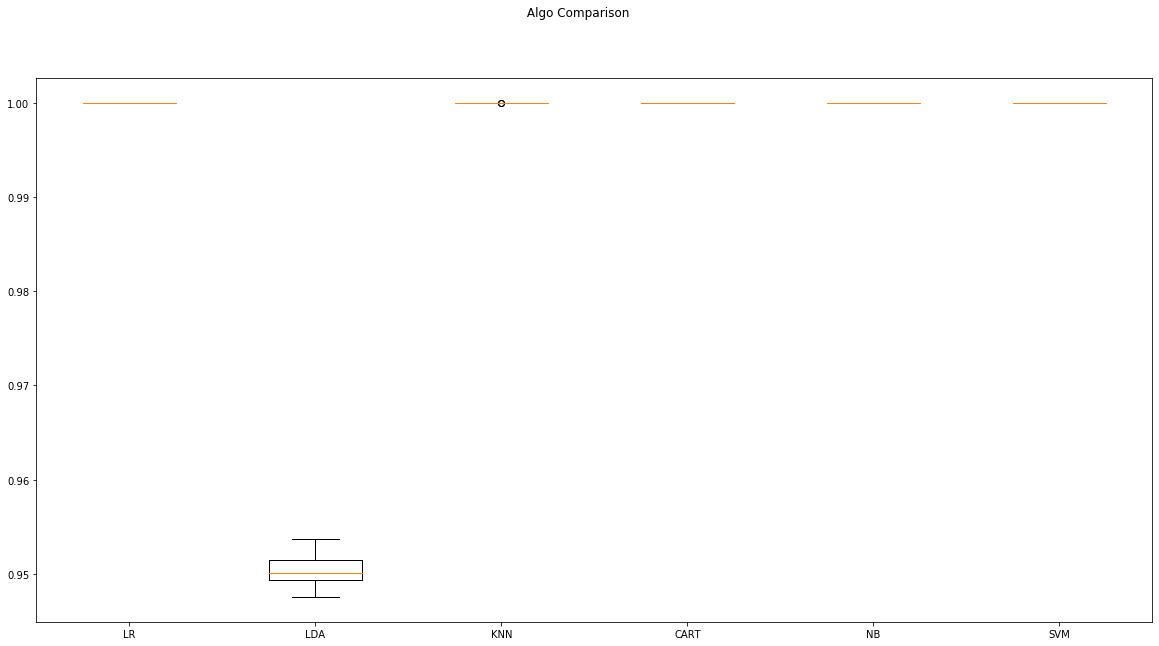

In [87]:
#Compare the end result 
fig = plt.figure()
fig.suptitle(' Algo Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###  Review Process Review of Process  

###  Determine Next Steps   

###  List of Possible Actions Decision  

###  Review Recommendations to Organization

# V- References
 Please provide at least 5 references.